```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. Distributions: 
    - https://mathworld.wolfram.com/PoissonDistribution.html
    - https://mathworld.wolfram.com/BinomialDistribution.html
    - https://mathworld.wolfram.com/UniformDistribution.html

```

# Math - Probability

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset,
)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

- Probability
- Primitive events
- Independence
- Conditional Probability
- Probability distributions

## Probability

Most of us are practically exposed to probability in our youth: rolling dice, flipping coins, and playing cards all give concrete examples of `random events`. When I roll a standard six-sided die—you role-playing gamers know about all the other-sided dice that are out there—there are six different outcomes that can happen. Each of those events has an equal chance of occurring. We say that the probability of each event is 1/6 . Mathematically, if I — a Roman numeral one — is the case where we roll a one, we’ll write that as P(I) = 1/6. We read this as “the probability of rolling a one is one-sixth.”

We can roll dice in Python in a few different ways. Using NumPy, we can generate evenly weighted random events with `np.random.randint`. randint is designed to mimic Python’s indexing semantics, which means that we include the starting point and we exclude the ending point. The practical upshot is that if we want values from 1 to 6, we need to start at 1 and end at 7: the 7 will not be included. If you are more mathematically inclined, you can remember this as a half-open interval.

In [4]:
np.random.randint(1, 7)

4

If we want to convince ourselves that the numbers are really being generated with equal likelihoods (as with a perfect, fair die), we can draw a chart of the frequency of the outcomes of many rolls. We’ll do that in three steps. We’ll roll a die, either a few times or many times:

In [5]:
few_rolls = np.random.randint(1, 7, size=10)
few_rolls

array([4, 6, 4, 3, 2, 1, 2, 4, 4, 6])

In [6]:
many_rolls = np.random.randint(1, 7, size=1000)
many_rolls

array([3, 3, 1, 4, 6, 1, 3, 6, 3, 1, 1, 6, 6, 6, 1, 1, 4, 6, 2, 1, 3, 2,
       1, 1, 4, 2, 1, 5, 1, 5, 5, 4, 3, 4, 4, 5, 6, 4, 1, 1, 4, 1, 6, 1,
       1, 1, 2, 6, 3, 4, 3, 3, 2, 6, 4, 4, 2, 4, 3, 1, 6, 1, 1, 4, 5, 1,
       2, 6, 1, 6, 2, 5, 1, 5, 6, 1, 2, 5, 5, 5, 1, 4, 3, 2, 5, 1, 5, 4,
       4, 5, 2, 1, 3, 2, 6, 2, 4, 5, 4, 2, 1, 5, 2, 1, 1, 6, 6, 5, 4, 4,
       6, 4, 1, 4, 5, 4, 1, 5, 5, 5, 6, 4, 6, 3, 1, 6, 4, 6, 1, 1, 3, 5,
       3, 4, 3, 1, 1, 2, 3, 3, 3, 1, 4, 1, 2, 6, 2, 3, 3, 5, 2, 4, 1, 6,
       3, 2, 2, 1, 4, 4, 4, 2, 6, 4, 4, 1, 5, 2, 2, 4, 4, 2, 5, 3, 1, 6,
       6, 1, 1, 3, 6, 5, 4, 1, 2, 6, 3, 5, 5, 6, 5, 5, 2, 3, 2, 2, 2, 1,
       1, 3, 6, 4, 2, 3, 2, 6, 4, 4, 4, 3, 2, 3, 5, 1, 5, 4, 3, 1, 2, 2,
       1, 1, 6, 4, 3, 4, 1, 1, 6, 5, 4, 3, 1, 5, 5, 5, 5, 4, 3, 3, 6, 4,
       3, 1, 5, 1, 3, 2, 5, 3, 3, 5, 1, 5, 5, 6, 2, 3, 3, 1, 4, 6, 1, 2,
       2, 1, 5, 1, 4, 3, 6, 6, 4, 6, 4, 3, 2, 5, 2, 6, 2, 1, 5, 1, 1, 1,
       5, 4, 2, 1, 4, 5, 5, 3, 3, 2, 3, 1, 3, 4, 5,

We’ll count up how many times each event occurred with np.histogram. Note that
`np.histogram` is designed around plotting buckets of continuous values. Since we want to capture discrete values, we have to create a bucket that surrounds our values of interest. We capture the ones, I, by making a bucket between 0.5 and 1.5.

In [11]:
np.arange(.5, 7.5)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

In [8]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))#[0]
few_counts

(array([1, 2, 1, 4, 0, 2]), array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]))

In [10]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

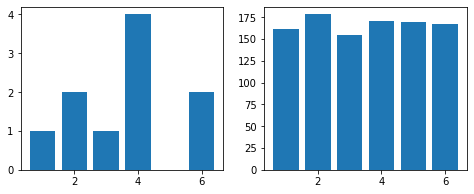

In [15]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts);

When dealing with random events and overall behavior, a small sample can be misleading. We may need to crank up the number of examples — rolls, in this case — to get a better picture of the underlying behavior.

## Primitive Events
Before experimenting, we assumed that the probability of rolling a one is one out of six.
That number comes from
```
 #ways this event can occur / #of different events 
```
We can test our understanding of that ratio by asking, “What is the probability of rolling an odd number?” Well, using Roman numerals to indicate the outcomes of a roll, the odd numbers in our space of events are I, III, V. There are three of these and there are six total primitive events. So, we have 
```
P(odd) = 3/6 = 1/2
```
Fortunately, that gels with our intuition.

We can approach this calculation a different way: an odd can occur in three ways and those three ways don’t overlap. So, we can add up the individual event probabilities:
```
P(odd) = P(I) + P(III) + P(V) = 1/6 + 1/6 + 1/6 = 3/6 = 1/2
```
`We can get probabilities of compound events by either counting primitive events or adding up the probabilities of primitive events`. It’s the same thing done in two different ways.

This basic scenario gives us an in to talk about a number of important aspects of probability:
- The sum of the probabilities of all possible primitive events in a universe is 1. P(I) + P(II) + P(III) + P(IV) + P(V) + P(VI) = 1.
- The probability of an event not occurring is 1 minus the probability of it occurring. P(even) = 1 − P(not even) = 1 − P(odd). When discussing probabilities, we often write “not” as ¬, as in P(¬even). So, P(¬even) = 1 − P(even).
- There are `nonprimitive events`. Such a compound event is a combination of primitive events. The event we called odd joined together three primitive events.
- A roll will be even or odd, but not both, and all rolls are either even or odd. These two compound events cover all the possible primitive events without any overlap. So, P(even) + P(odd) = 1.

Compound events are also recursive. We can create a compound event from other compound events. Suppose I ask, “What is the probability of getting an odd or a value greater than 3 or both?” That group of events, taken together, is a larger group of primitive events. 

If I attack this by counting those primitive events, I see that the odds are odd = {I, III,V} and the big values are big = {IV,V,VI}. Putting them together, I get {I, III, IV,V,VI} or 5/6. The probability of this compound event is a bit different from the probability of odds being 1/2 and the probability of greater-than-3 being 1/2. I can’t just add those probabilities. Why not? Because I’d get a sum of one—meaning we covered everything— but that only demonstrates the error. The reason is that the two compound events overlap: they share primitive events. Rolling a five, V, occurs in both subgroups. Since they overlap, we can’t just add the two together. We have to add up everything in both groups individually and then remove one of whatever was double-counted. The double-counted events were in both groups—they were odd and big. In this case, there is just one double-counted event, V. So, removing them looks like 
```
P(odd) + P(big) − P(odd and big). That’s 1/2 + 1/2 − 1/6 = 5/6
```

## Independence
If we roll two dice, a few interesting things happen. The two dice don’t communicate or act on one another in any way. Rolling a I on one die does not make it more or less likely to roll any value on the other die. This concept is called `independence`: the two events — rolls of the individual dice — are independent of each other.

For example, consider a different set of outcomes where each event is the sum of the rolls of two dice. Our sums are going to be values between 2 (we roll two Is) and 12 (we roll two VIs). What is the probability of getting a sum of 2? We can go back to the counting method: there are 36 total possibilities and the only way we can roll a total of 2 is by rolling two Is which can only happen one way. So, P(2) = 1/36.

We can also reach that conclusion — because the dice don’t communicate or influence
each other — by rolling I on die 1 and I on die 2, giving P(I1)P(I2) = 1/6 · 1/6 = 1/36. 

`If events are independent, we can multiply their probabilities to get the joint probability of both occurring`. Also, if we multiply the probabilities and we get the same probability as
the overall resulting probability we calculated by counting, we know the events must be
independent. Independent probabilities work both ways: they are an if-and-only-if.

We can combine the ideas of (1) summing the probabilities of different events and (2) the independence of events, to calculate the probability of getting a total of three P(3). Using the event counting method, we figure that this event can happen in two different ways: we roll (I, II) or we roll (II, I) giving 2/36 = 1/18. Using probability calculations, we can write: 
```
P(3) = P((I, II)) + P((II, I)) 
     = P(I)P(II) + P(II)P(I)
     = 1/6 · 1/6 + 1/6 · 1/6 
     = 2/36 
     = 1/18
```
If we see multiplication, we can mentally think about the two-dice scenario. If we have a scenario like the dice, we can multiply.

## Conditional Probability
Let’s create one more scenario. In classic probability-story fashion, we will talk about two urns. Why urns? I guess that, before we had buckets, people had urns. So, if you don’t like urns, you can think about buckets.

The first urn UI has three red balls and one blue ball in it. The second urn UII has two
red balls and two blue balls. We flip a coin and then we pull a ball out of an urn. If the coin comes up heads, we pick from UI ; otherwise, we pick from UII. We end up at UI half the time and then we pick a red ball 3/4 of those times. We end up at UII the other half of the time and we pick a red ball 2/4 of those times. This scenario is like wandering down a path with a few intersections. As we walk along, we are presented with a different set of options at the next crossroads.

<img src="images/urns.png" alt="" style="width: 400px;"/>

If we sketch out the paths, it looks like figure above. If we count up the possibilities, we will see that under the whole game, we have five red outcomes and three blue outcomes. P(red) = 5/8. Simple, right? Not so fast, speedy! This counting argument only works when we have equally likely choices at each step. Imagine we have a very wacky coin that causes me to end up at Urn I 999 out of 1000 times: then our chances of picking a red ball would end up quite close to the chance of just picking a red ball from Urn I. It would be similar to almost ignoring the existence of Urn II. We should account for this difference and, at the same time, make use of updated information that might come along the way.

If we play a partial game and we know that we’re at Urn I — for example, after we’ve
flipped a head in the first step—our odds of picking a red ball are different. Namely, the probability of picking a red ball—given that we are picking from Urn I — is 3/4. In
mathematics, we write this as
```
P(red | UI) = 3/4
```
The vertical bar, `|`, is read as “given”. `Conditioning` — a commonly verbed noun in machine learning and statistics — constrains us to a subset of the primitive events that could possibly occur. In this case, we condition on the occurrence of a head on our coin flip.

How often do we end up picking a red ball from Urn I? Well, to do that we have to (1)
get to Urn I by flipping a head, and then (2) pick a red ball. Since the coin doesn’t affect the events in Urn I — it picked Urn I, not the balls within Urn I — the two are
independent and we can multiply them to find the joint probability of the two events
occurring. So, 
```
P(red and UI) = P(red | UI)P(UI) = 1/2 · 3/4 = 3/8
```
The order here may seem a bit weird. I’ve written it with the later event — the event that depends on UI — first and the event that kicks things off, UI, second. This order is what you’ll usually see in written mathematics. Why? Largely because it places the | UI next to the P(UI). You can think about it as reading from the bottom of the diagram back towards the top.

Since there are two nonoverlapping ways to pick a red ball (either from Urn I or
from Urn II), we can add up the different possibilities. Just as we did for Urn I, for
Urn II we have 
```
P(red and UII) = P(red | UII)P(UII) = 1/2 · 2/4 = 2/8
```
Adding up the alternative ways of getting red balls, either out of Urn I or out of Urn II, gives us:
```
P(red) = P(red | UI)P(UI) + P(red | UII)P(UII) = 3/8 + 2/8 = 5/8
```
We got the same answer as we got by the simple counting method. But now, you know what
that important vertical bar, `P( | )`, means.

## Probability Distributions
There are many different ways of assigning probabilities to events. Some of them are based on direct, real-world experiences like dice and cards. Others are based on hypothetical scenarios. We call the mapping between events and probabilities a `probability distribution`. If you give me an event, then I can look it up in the probability distribution and tell you the probability that it occurred. Based on the rules of probability we just discussed, we can also calculate the probabilities of more complicated events. When a group of events shares a common probability value — like the different faces on a fair die — we call it a `uniform distribution`. Like Storm Troopers in uniform, they all look the same.

There is one other, very common distribution that we’ll talk about (`binomial distribution` - [wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)). It’s so fundamental that there are multiple ways to approach it. We’re going to go back to coin flipping. If I flip a coin many, many times and count the number of heads, here’s what happens as we increase the number of flips:

[0 1 2 3 4]
[0.03125 0.15625 0.3125  0.3125  0.15625]
-----
[0 1 2 3 4 5 6 7 8 9]
[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563]
-----
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[9.53674316e-07 1.90734863e-05 1.81198120e-04 1.08718872e-03
 4.62055206e-03 1.47857666e-02 3.69644165e-02 7.39288330e-02
 1.20134354e-01 1.60179138e-01 1.76197052e-01 1.60179138e-01
 1.20134354e-01 7.39288330e-02 3.69644165e-02 1.47857666e-02
 4.62055206e-03 1.08718872e-03 1.81198120e-04 1.90734863e-05]
-----
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[9.09494702e-13 3.63797881e-11 7.09405867e-10 8.98580765e-09
 8.31187208e-08 5.98454790e-07 3.49098627e-06 1.69562190e-05
 6.99444035e-05 2.48691213e-04 7.70942759e-04 2.10257116e-03
 5.08121364e-03 1.09441525e-02 2.11065797e-02 3.65847382e-02
 5.71636534e-02 8.07016284e-02 1.03118747e-01 1.19400655e-

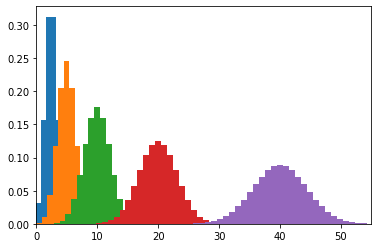

In [22]:
import scipy.stats as ss

b = ss.distributions.binom

for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips)
    print(success)

    our_distribution = b.pmf(success, flips, .5)
    print(our_distribution)
    print('-----')
    
    plt.hist(success, flips, weights=our_distribution)

plt.xlim(0, 55);

If I ignore that the whole numbers are counts and replace the graph with a smoother
curve that takes values everywhere, instead of the stair steps that climb or descend at whole numbers, I get something like this:

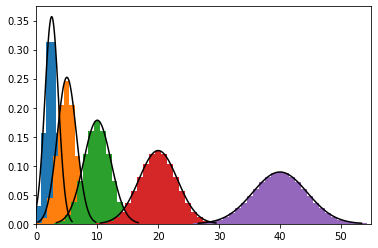

In [23]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)

    # normal approximation to that binomial
    # we have to set the mean and standard deviation
    mu = flips * .5,
    std_dev = np.sqrt(flips * .5 * (1-.5))

    # we have to set up both the x and y points for the normal
    # we get the ys from the distribution (a function)
    # we have to feed it xs, we set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k');

plt.xlim(0, 55);

You can think about increasing the number of coin flips as increasing the accuracy of a measurement — we get more decimals of accuracy. We see the difference between 4 and 5 out of 10 and then the difference between 16, 17, 18, 19, and 20 out of 40. Instead of
a big step, it becomes a smaller, more gradual step. The step-like sequences become
progressively better approximated by the smooth curves. Often, these smooth curves are
called bell-shaped curves — and there are other bellshaped curves out there. The specific bell-shaped curve that we are stepping towards is called the `normal distribution`.

The normal distribution has three important characteristics:
1. Its midpoint has the most likely value—the hump in the middle.
2. It is symmetric—can be mirrored— about its midpoint.
3. As we get further from the midpoint, the values fall off more and more quickly.

There are a variety of ways to make these characteristics mathematically precise. It turns out that with suitable mathese and small-print details, those characteristics also lead to the normal distribution — the smooth curve we were working towards! The primary feature we need from the normal distribution is its shape.